In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("vgchartz-2024 copy.1.xlsx")
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaT
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaT
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [7]:
# Drop the 'img' column
df_cleaned = df.drop(columns=['img'])

In [9]:
# Convert 'release_date' and 'last_update' to datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')
df_cleaned['last_update'] = pd.to_datetime(df_cleaned['last_update'], errors='coerce')

In [13]:
# Handle missing values: Fill missing critic scores with the average score
df_cleaned['critic_score'] = df_cleaned['critic_score'].fillna(df_cleaned['critic_score'].mean())

In [15]:
# Drop rows with any remaining NaN values (e.g., in sales columns)
df_cleaned.dropna(inplace=True)

In [17]:
# Check for and drop duplicate entries
df_cleaned.drop_duplicates(inplace=True)

# Visualization 1: Top 10 Games by Total Sales

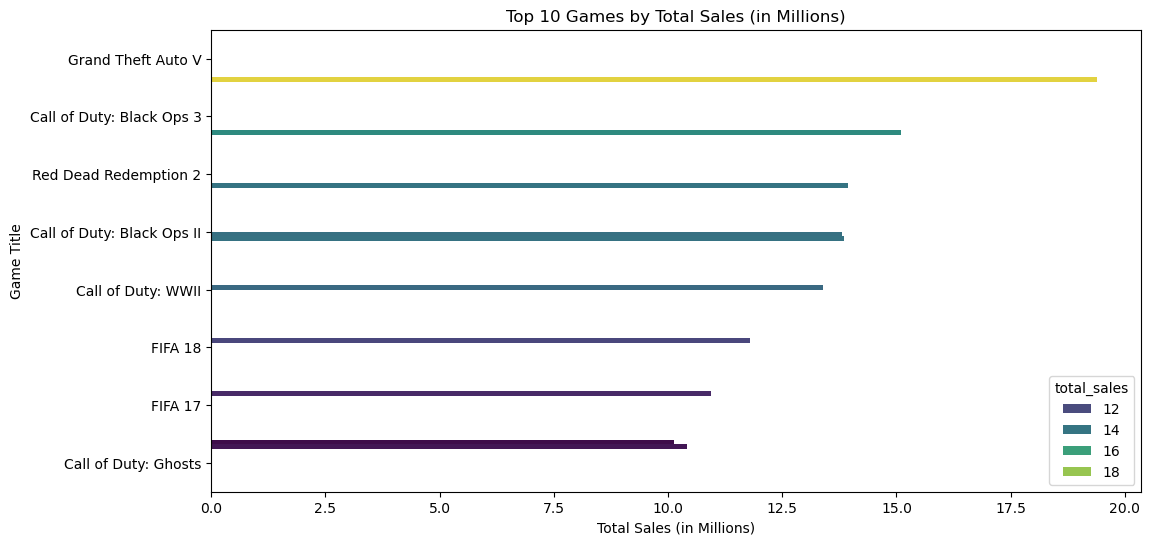

In [104]:
# Visualization 1: Top 10 Games by Total Sales
top_10_sales = df_cleaned.sort_values(by='total_sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='title', data=top_10_sales, hue='total_sales', palette='viridis')
plt.title('Top 10 Games by Total Sales (in Millions)')
plt.xlabel('Total Sales (in Millions)')
plt.ylabel('Game Title')
plt.show()

# Visualization 2: Sales Distribution by Genre

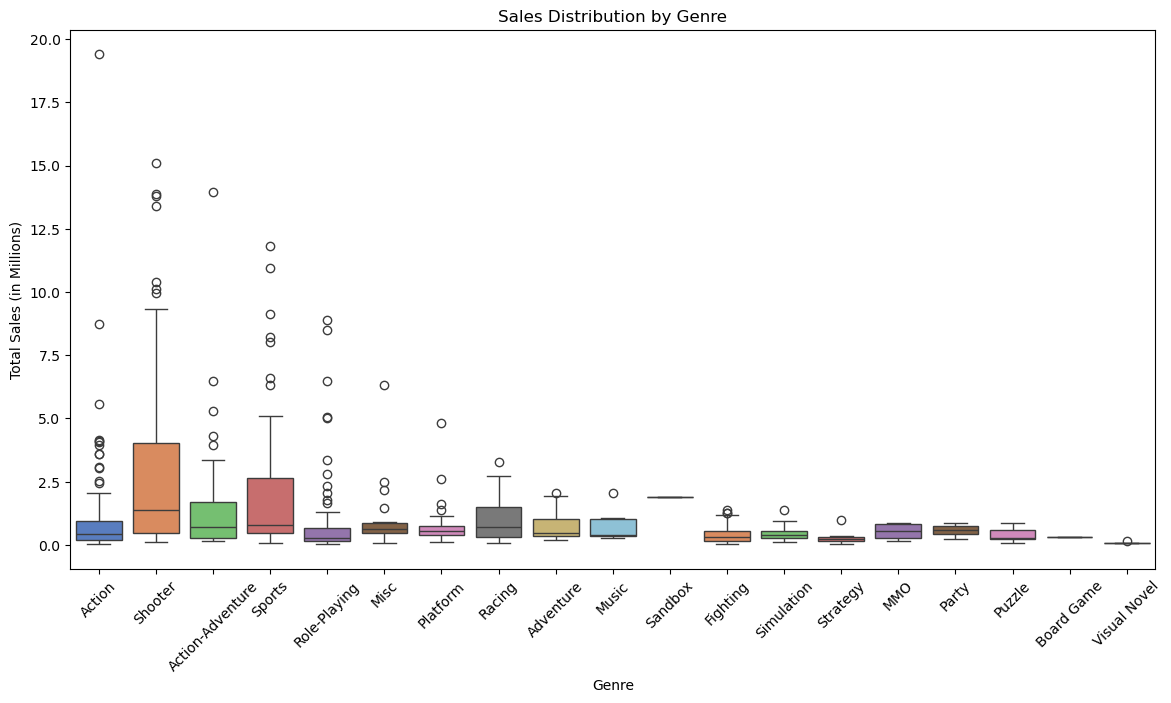

In [37]:
# Visualization 2: Sales Distribution by Genre
plt.figure(figsize=(14, 7))
sns.boxplot(x='genre', y='total_sales', data=df_cleaned,hue='genre', palette='muted')
plt.title('Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Average Critic Score by Console

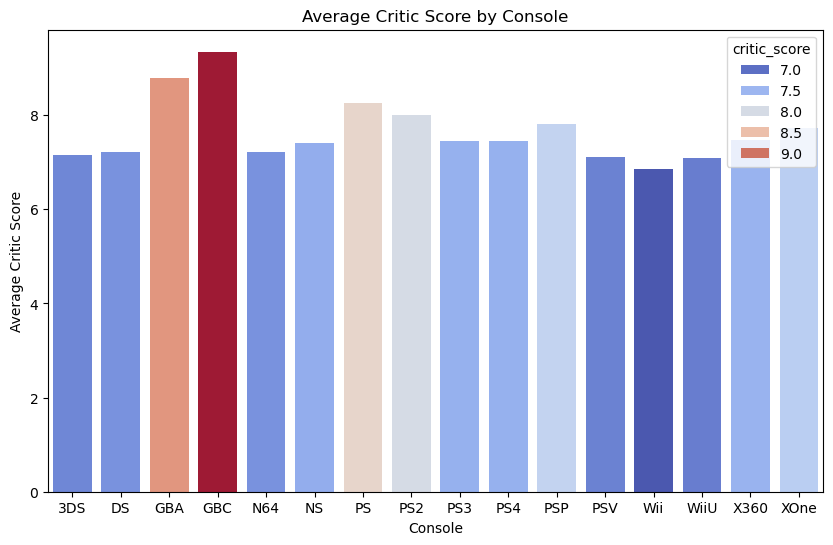

In [46]:
# Visualization 3: Average Critic Score by Console
avg_score_console = df_cleaned.groupby('console')['critic_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='console', y='critic_score', data=avg_score_console, hue='critic_score', palette='coolwarm')
plt.title('Average Critic Score by Console')
plt.xlabel('Console')
plt.ylabel('Average Critic Score')
plt.show()

# Visualization 4: Sales Trend Over Time

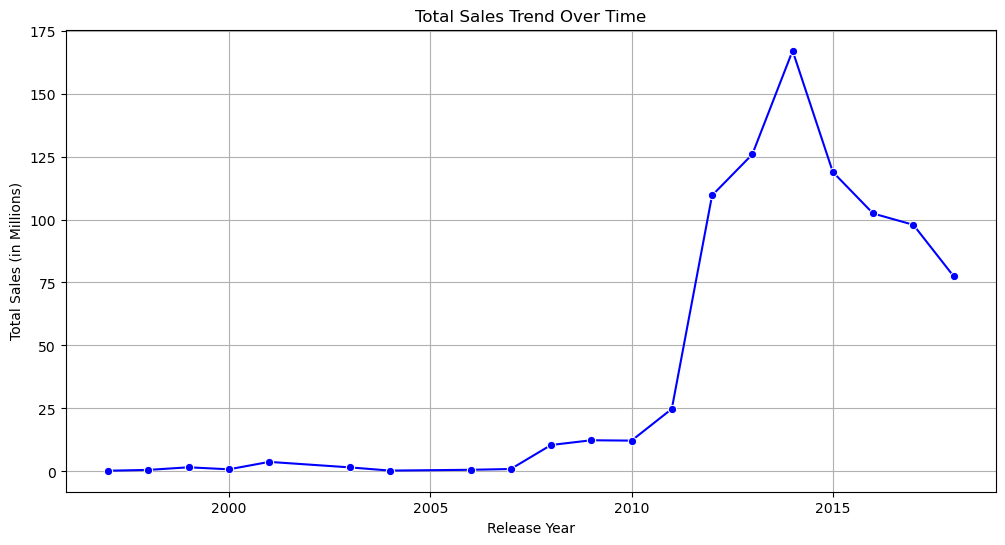

In [49]:
# Visualization 4: Sales Trend Over Time
df_cleaned['release_year'] = df_cleaned['release_date'].dt.year
sales_trend = df_cleaned.groupby('release_year')['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='total_sales', data=sales_trend, marker='o', color='blue')
plt.title('Total Sales Trend Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (in Millions)')
plt.grid(True)
plt.show()

# 5. Sales Breakdown by Region and Genre

In [51]:
# 5. Sales Breakdown by Region and Genre
region_sales = df_cleaned.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().reset_index()
region_sales_melted = region_sales.melt(id_vars='genre', var_name='region', value_name='sales')

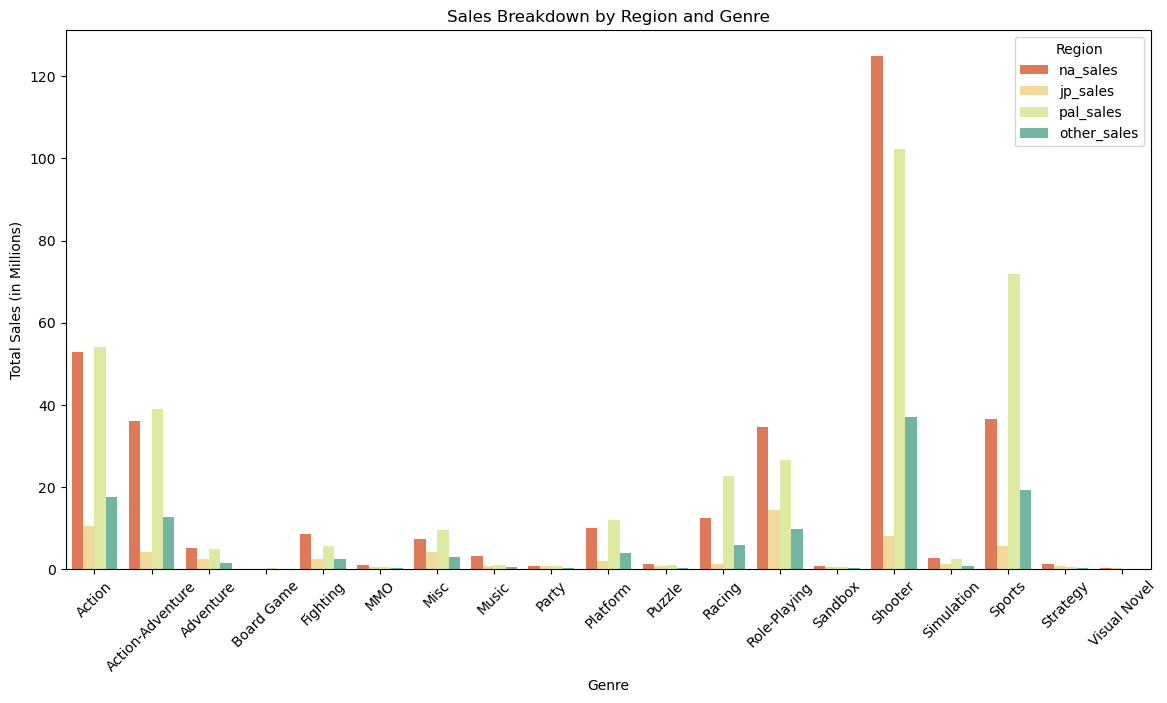

In [53]:
plt.figure(figsize=(14, 7))
sns.barplot(x='genre', y='sales', hue='region', data=region_sales_melted, palette='Spectral')
plt.title('Sales Breakdown by Region and Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

# 6. Top Publishers and Developers by Sales

In [58]:
# 2. Top Publishers and Developers by Sales
top_publishers = df_cleaned.groupby('publisher')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(10)
top_developers = df_cleaned.groupby('developer')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(10)

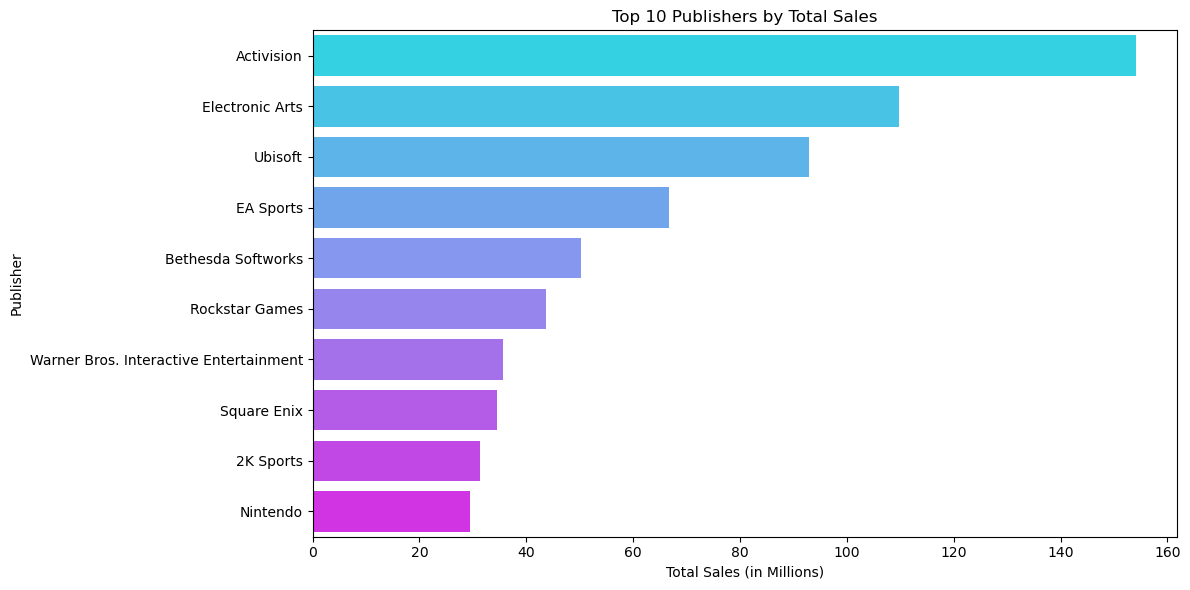

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='publisher', data=top_publishers,hue='publisher', palette='cool')
plt.title('Top 10 Publishers by Total Sales')
plt.xlabel('Total Sales (in Millions)')
plt.tight_layout()
plt.ylabel('Publisher')
plt.show()

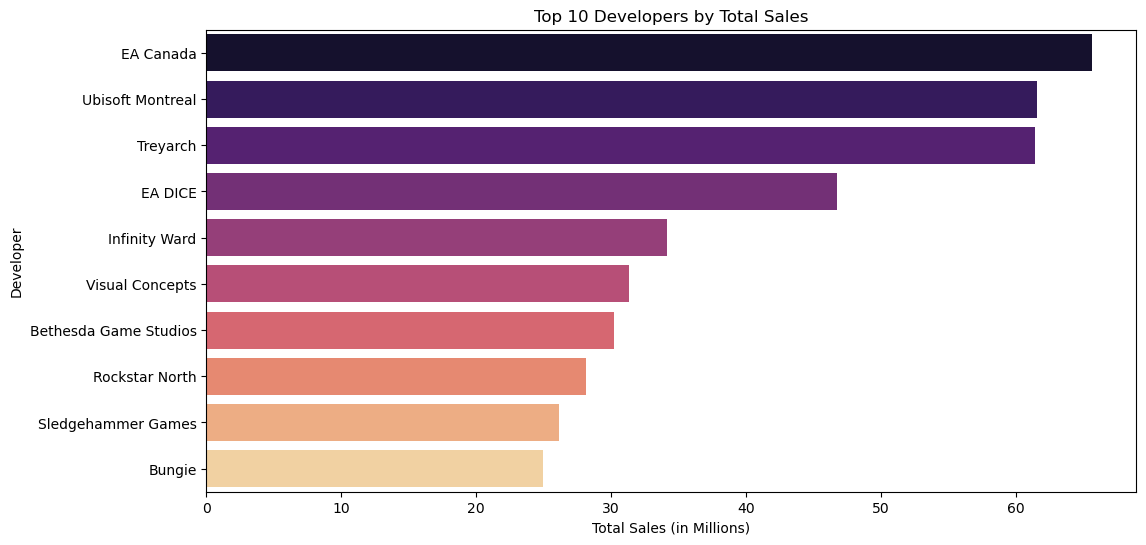

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='developer', data=top_developers,hue='developer', palette='magma')
plt.title('Top 10 Developers by Total Sales')
plt.xlabel('Total Sales (in Millions)')
plt.ylabel('Developer')
plt.show()

# 7. Correlation Analysis: Critic Scores vs. Sales

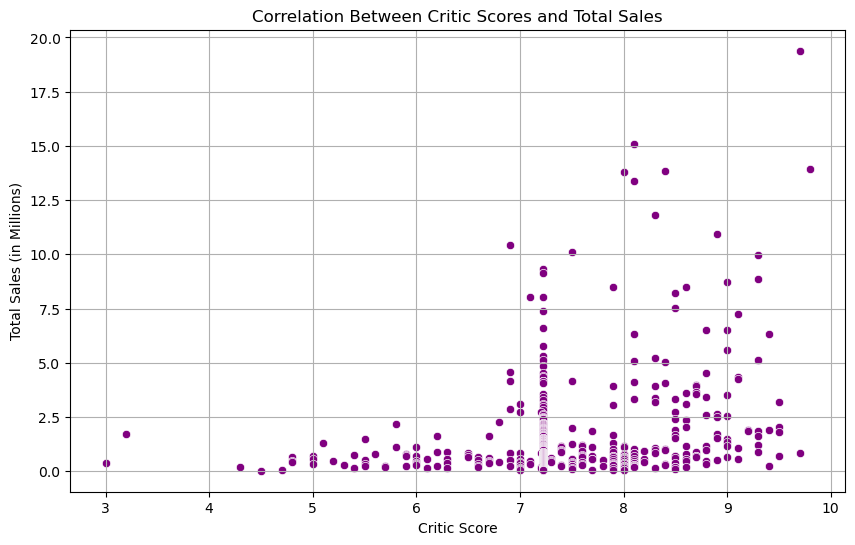

In [80]:
# 3. Correlation Analysis: Critic Scores vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_cleaned, color='purple')
plt.title('Correlation Between Critic Scores and Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in Millions)')
plt.grid(True)
plt.show()

# 8. Genre Popularity Over Time

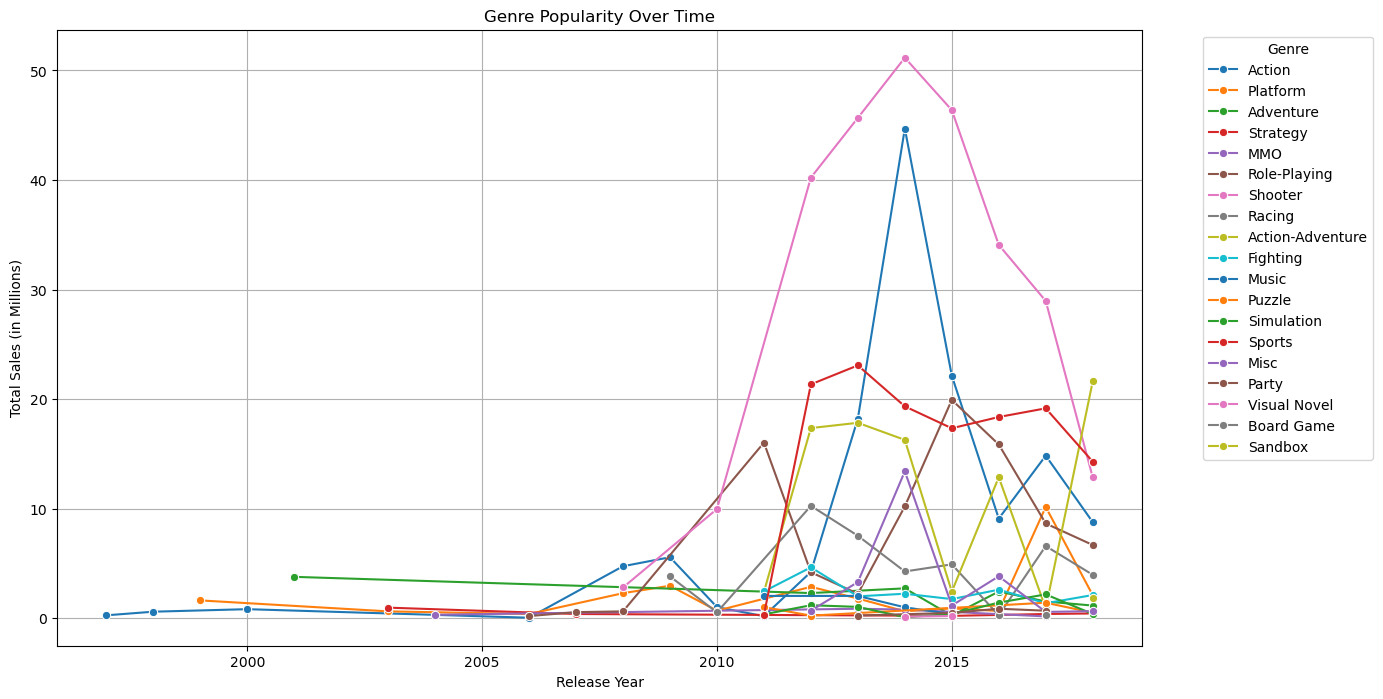

In [83]:
# 8. Genre Popularity Over Time
genre_trend = df_cleaned.groupby(['release_year', 'genre'])['total_sales'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='total_sales', hue='genre', data=genre_trend, marker='o', palette='tab10')
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (in Millions)')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()